In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
train_df = pd.read_csv("../train_labels.csv")
train_df.head()

id  target                    file_path  fold
0  0000799a2b2c42d       0  train/0/0000799a2b2c42d.npy     2
1  00042890562ff68       0  train/0/00042890562ff68.npy     3
2  0005364cdcb8e5b       0  train/0/0005364cdcb8e5b.npy     3
3  0007a5a46901c56       0  train/0/0007a5a46901c56.npy     2
4  0009283e145448e       0  train/0/0009283e145448e.npy     2

In [17]:
clip_rate = 3.5
# image = np.load("../train/0/00776881dd80050.npy")
# image = np.load("../train/0/0028a35de92941d.npy")
# image = np.load("../train/0/00412077d1aef6f.npy")
image = np.load("../train/0/00973367d6481e2.npy")
image = image.astype(np.float32)
image = np.vstack(image).transpose((1, 0))
image.shape

(256, 1638)

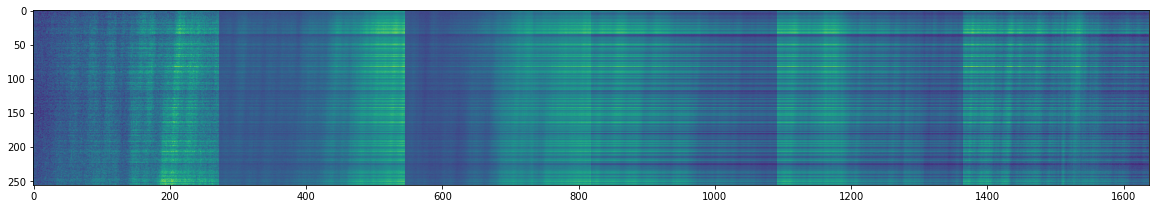

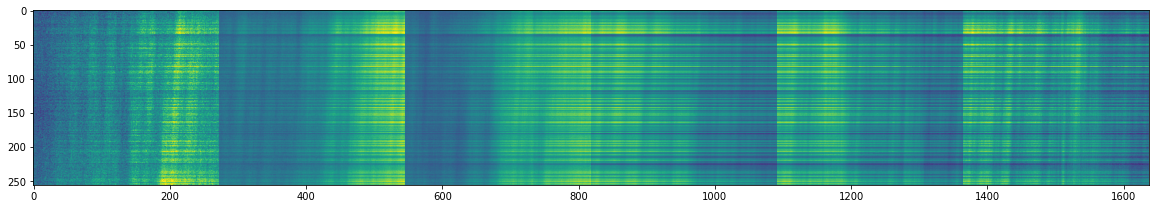

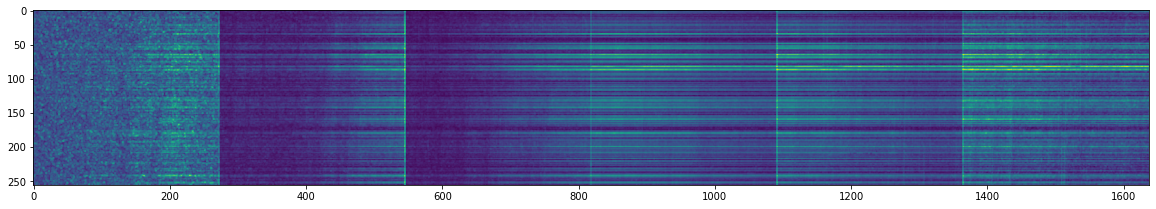

In [20]:
# resized = cv2.resize(image, (1024, 512))
origin_image = image
plt.figure(figsize=(20, 20))
plt.imshow(origin_image)
plt.show()

mean = np.mean(image)
std = np.std(image)
clipped_image = np.clip(image, mean-clip_rate*std, mean+clip_rate*std)
clipped_image = clipped_image[:, :, np.newaxis]
plt.figure(figsize=(20, 20))
plt.imshow(clipped_image)
plt.show()

augmented = cv2.morphologyEx(clipped_image, cv2.MORPH_GRADIENT, kernel=np.ones((3, 3), dtype=np.float32))
# augmented = cv2.morphologyEx(clipped_image, cv2.MORPH_CLOSE, kernel=np.ones((3, 3), dtype=np.float32))
plt.figure(figsize=(20, 20))
plt.imshow(augmented)
plt.show()

In [21]:
result_df = train_df.query('target == 1').reset_index(drop=True)
result_df = result_df.head(20)

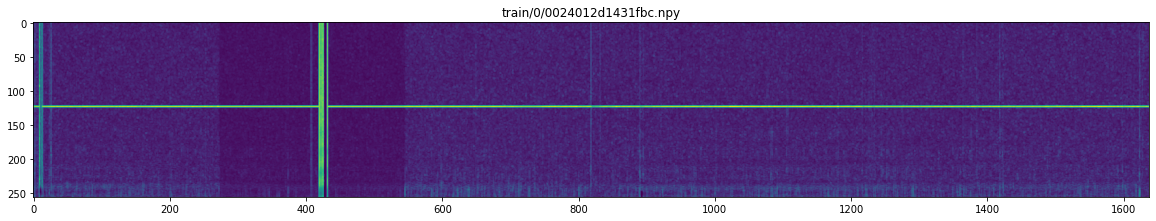

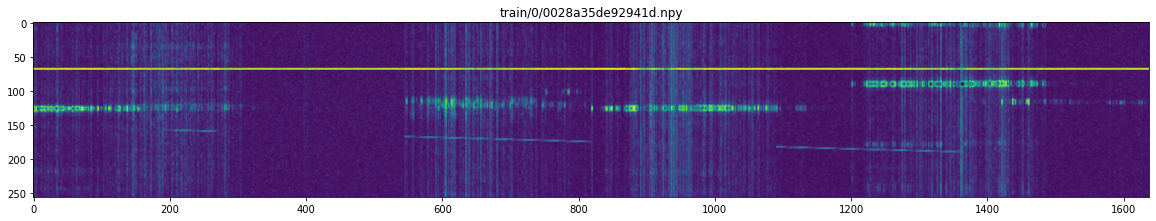

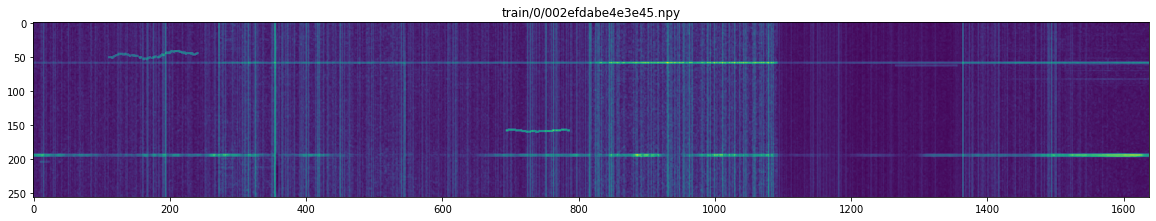

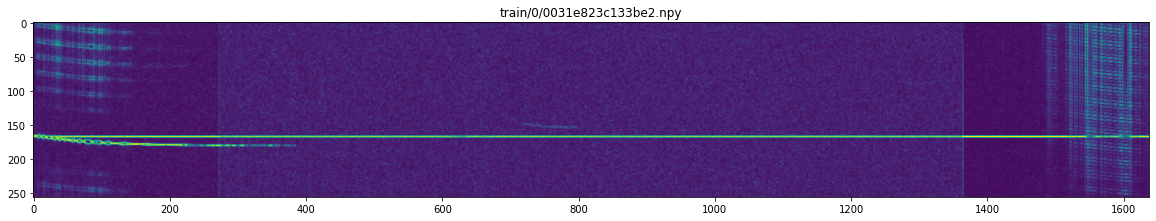

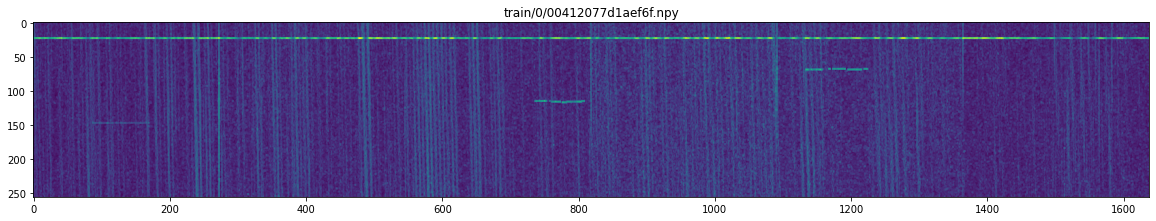

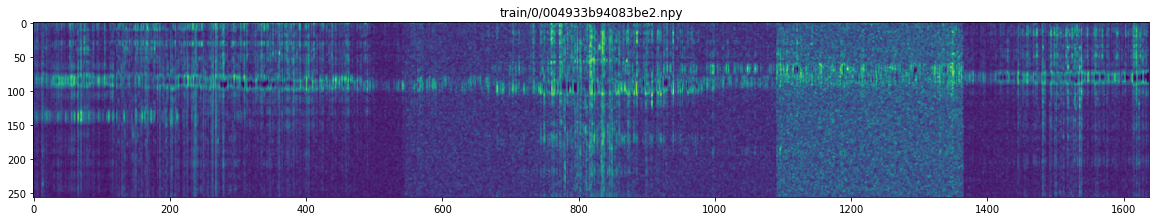

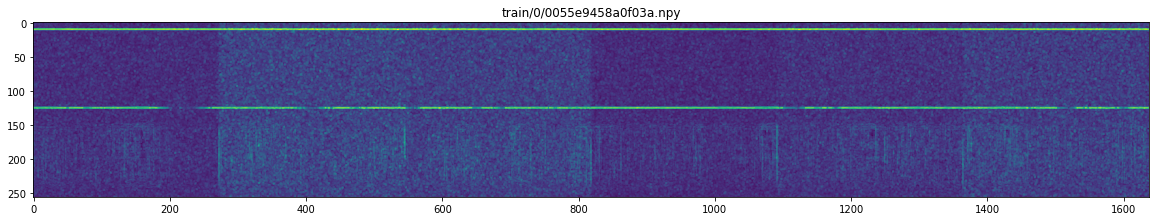

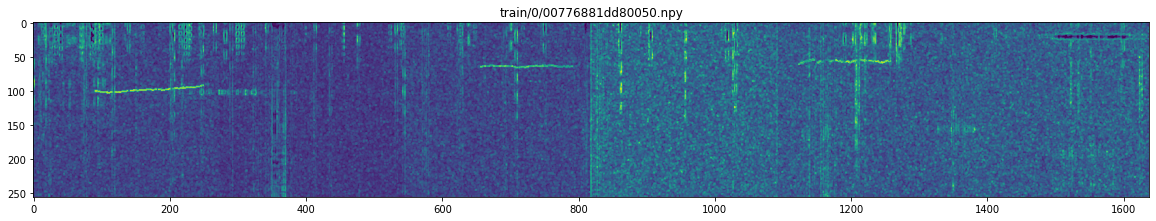

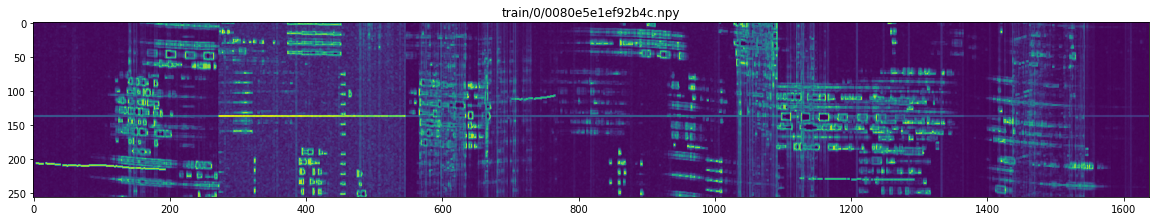

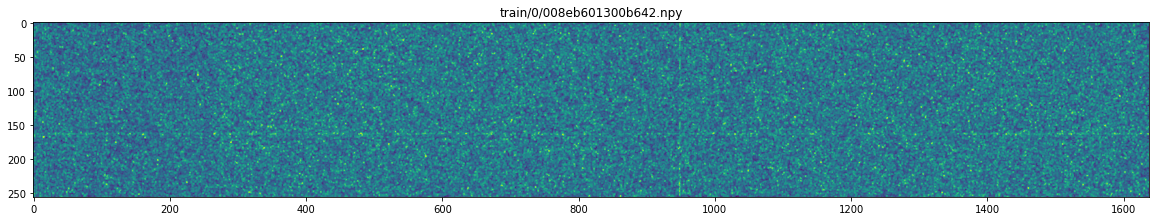

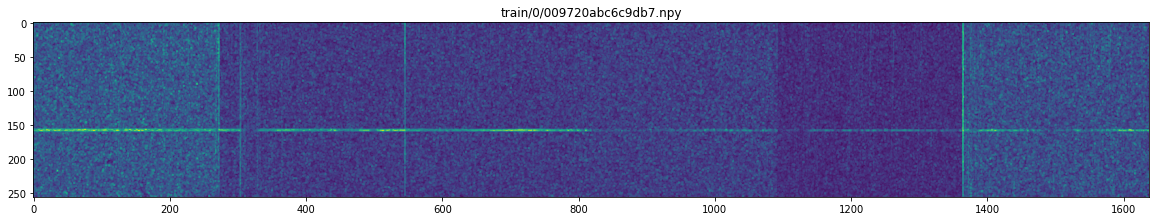

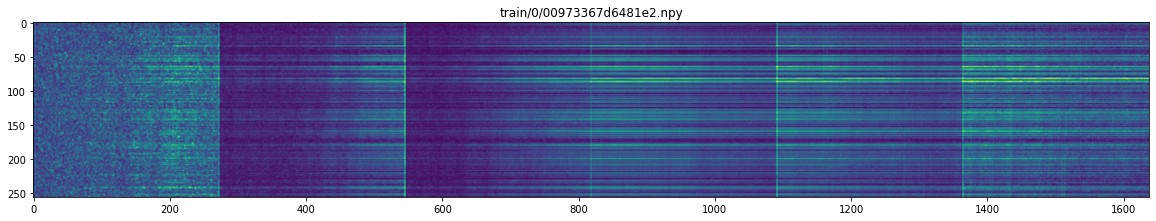

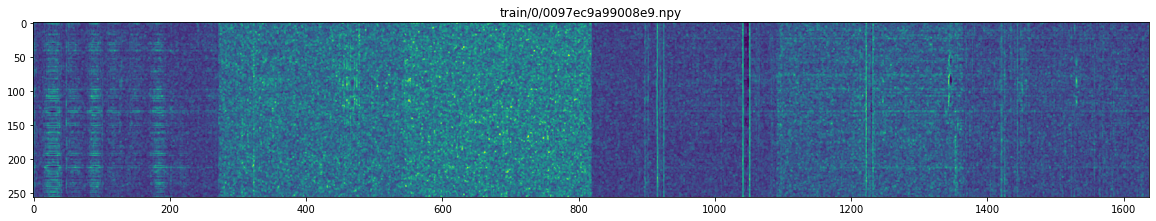

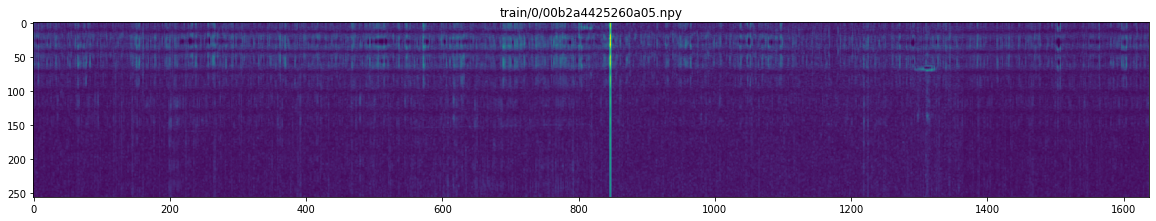

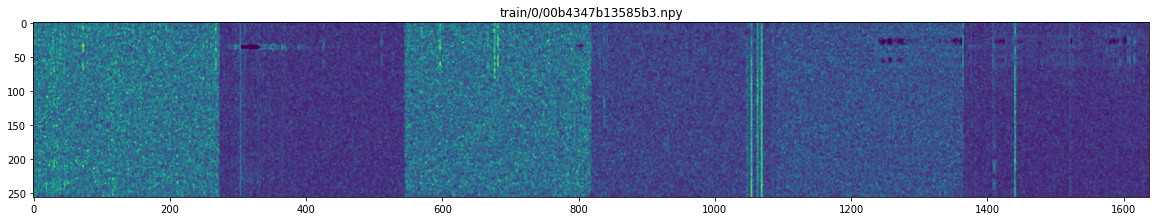

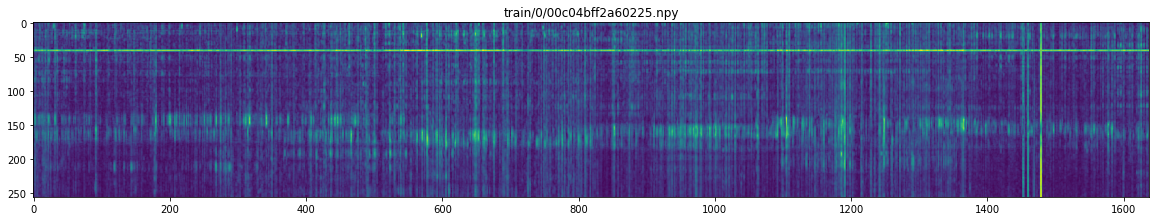

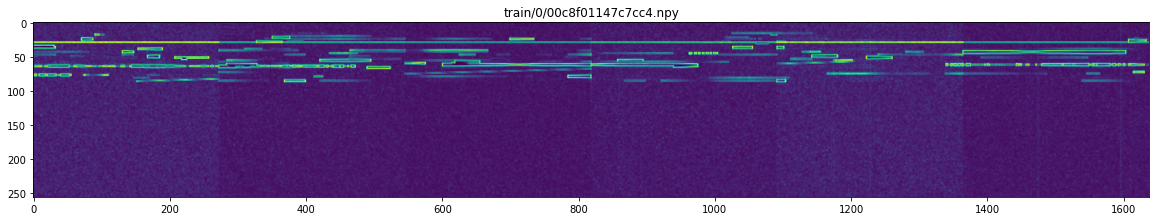

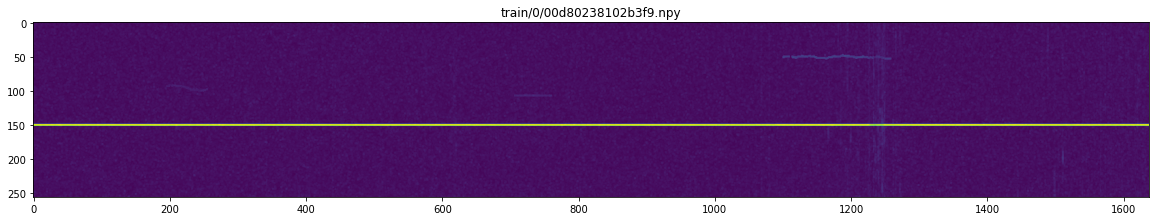

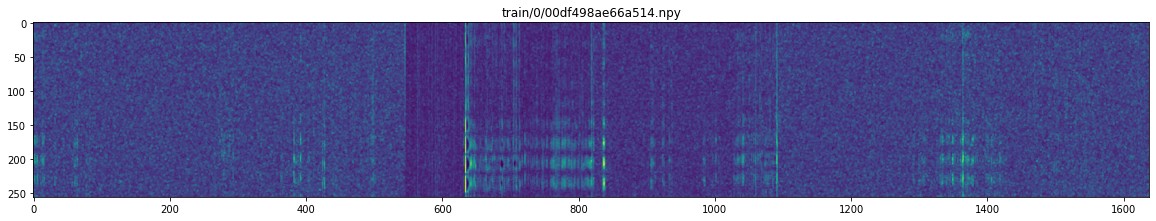

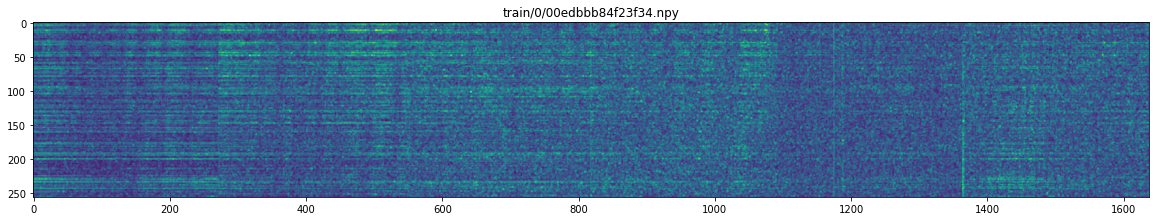

In [27]:
for idx in range(result_df.shape[0]):
    image = np.load("../" + result_df.loc[idx, "file_path"])
    image = image.astype(np.float32)
    image = np.vstack(image).transpose((1, 0))
    mean = np.mean(image)
    std = np.std(image)
    image = np.clip(image, mean-clip_rate*std, mean+clip_rate*std)
    image = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel=np.ones((3, 3), dtype=np.float32))
    image = image[:, :, np.newaxis]
    
    plt.figure(figsize=(20, 20))
    plt.imshow(image)
    plt.title(result_df.loc[idx, "file_path"])
    plt.show()